In [1]:
import glob
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
#from scipy import interp
from sklearn.metrics import roc_auc_score
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from __future__ import print_function
import numpy as np  # Use numpy for interpolation
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from __future__ import print_function




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/CICDDOS-2019","*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

Resultant CSV after joining all CSV files at a particular location...


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,DrDoS_NetBIOS
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,DrDoS_NetBIOS
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,DrDoS_NetBIOS
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,DrDoS_NetBIOS
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,DrDoS_NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515494,677847,62535,516.0,516.0,305543,516.0,516.0,645.0,0,516.0,...,6.879963e+02,516.0,17,1.333326e+00,1.333326e+00,2064.0,2064,19373,3,TFTP
2515495,677848,62587,516.0,516.0,319952,516.0,516.0,645.0,0,516.0,...,6.880069e+02,516.0,17,1.333347e+00,1.333347e+00,2064.0,2064,14160,3,TFTP
2515496,677849,62474,516.0,516.0,273029,516.0,516.0,774.0,0,516.0,...,5.160000e+08,516.0,17,1.000000e+06,1.000000e+06,1032.0,1032,27866,1,TFTP
2515497,677850,62468,516.0,516.0,263806,516.0,516.0,645.0,0,516.0,...,6.879858e+02,516.0,17,1.333306e+00,1.333306e+00,2064.0,2064,62947,3,TFTP


In [4]:
df.dtypes

,0
Timestamp,int64
Source Port,int64
Min Packet Length,float64
Fwd Packet Length Min,float64
Flow ID,int64
Packet Length Mean,float64
Fwd Packet Length Max,float64
Average Packet Size,float64
ACK Flag Count,int64
Avg Fwd Segment Size,float64


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in df.columns:
    # Check if the column dtype is 'object'
    if df[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        df[column] = label_encoder.fit_transform(df[column])

# Now all object columns are encoded as integers


In [6]:
df.dtypes

,0
Timestamp,int64
Source Port,int64
Min Packet Length,float64
Fwd Packet Length Min,float64
Flow ID,int64
Packet Length Mean,float64
Fwd Packet Length Max,float64
Average Packet Size,float64
ACK Flag Count,int64
Avg Fwd Segment Size,float64


In [7]:
df.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,5
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,5
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,5
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,5
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,5


In [8]:
df.columns

Index([' Timestamp', ' Source Port', ' Min Packet Length',
       ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean',
       ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s',
       'Total Length of Fwd Packets', ' Subflow Fwd Bytes',
       ' Destination Port', ' act_data_pkt_fwd', ' Label'],
      dtype='object')

In [9]:
df.shape

(2515499, 21)

In [10]:
df.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
2515494,677847,62535,516.0,516.0,305543,516.0,516.0,645.0,0,516.0,...,6.879963e+02,516.0,17,1.333326,1.333326,2064.0,2064,19373,3,10
2515495,677848,62587,516.0,516.0,319952,516.0,516.0,645.0,0,516.0,...,6.880069e+02,516.0,17,1.333347,1.333347,2064.0,2064,14160,3,10
2515496,677849,62474,516.0,516.0,273029,516.0,516.0,774.0,0,516.0,...,5.160000e+08,516.0,17,1000000.000000,1000000.000000,1032.0,1032,27866,1,10
2515497,677850,62468,516.0,516.0,263806,516.0,516.0,645.0,0,516.0,...,6.879858e+02,516.0,17,1.333306,1.333306,2064.0,2064,62947,3,10
2515498,677851,62466,516.0,516.0,249982,516.0,516.0,645.0,0,516.0,...,6.879872e+02,516.0,17,1.333308,1.333308,2064.0,2064,59622,3,10


In [11]:
# Assuming your original DataFrame is named 'original_df'
# You may already have this DataFrame populated from previous steps

# Drop missing values
df.dropna(inplace=True)

# Display the shape of the DataFrame after removing missing values
print("Shape of original_df after removing missing values:", df.shape)


Shape of original_df after removing missing values: (2515499, 21)


In [12]:
# Calculate the size of each chunk
chunk_size = len(df) // 4

# Divide the DataFrame into 4 chunks
df1 = df.iloc[:chunk_size]
df2 = df.iloc[chunk_size: 2 * chunk_size]
df3 = df.iloc[2 * chunk_size: 3 * chunk_size]
df4 = df.iloc[3 * chunk_size:]

# Display the shapes of each DataFrame
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)
print("Shape of df4:", df4.shape)


Shape of df1: (628874, 21)
Shape of df2: (628874, 21)
Shape of df3: (628874, 21)
Shape of df4: (628877, 21)


In [13]:
df1.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,5
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,5
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,5
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,5
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,5


In [14]:
df2.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
628874,1039415,996,1472.0,1472.0,978411,1472.0,1472.0,2208.0,0,1472.0,...,9.813333e+08,1472.0,17,6.666667e+05,6.666667e+05,2944.0,2944,18542,1,6
628875,827111,882,1437.0,1437.0,781572,1437.0,1437.0,2155.5,0,1437.0,...,1.437000e+09,1437.0,17,1.000000e+06,1.000000e+06,2874.0,2874,56645,1,6
628876,883179,853,1472.0,1472.0,730634,1472.0,1472.0,2208.0,0,1472.0,...,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,3275,1,6
628877,618330,739,1379.0,1379.0,533901,1379.0,1379.0,2068.5,0,1379.0,...,2.758000e+09,1379.0,17,2.000000e+06,2.000000e+06,2758.0,2758,38014,1,6
628878,875033,772,1472.0,1472.0,591252,1472.0,1472.0,2208.0,0,1472.0,...,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,45476,1,6


In [15]:
df3.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
1257748,79603,729,1472.0,1472.0,562883,1472.0,1472.0,2208.0,0,1472.0,...,6.263830e+07,1472.0,17,4.255319e+04,4.255319e+04,2944.0,2944,25059,1,2
1257749,74594,900,1472.0,1472.0,603561,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,18125,1,2
1257750,63166,757,1472.0,1472.0,569536,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,63214,1,2
1257751,75043,531,1472.0,1472.0,332567,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,12130,1,2
1257752,54280,987,1472.0,1472.0,629583,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,22475,1,2


In [16]:
import pandas as pd
import numpy as np

def random_value_imputation(df, p=0.1):
    # Randomly select a subset of values to replace
    mask = np.random.choice([True, False], size=df.shape, p=[p, 1-p])
    # Generate random values to replace the selected subset
    replacements = np.random.choice(df.values.flatten(), size=df.shape)
    # Apply replacements to the dataframe
    noisy_df = df.mask(mask, replacements)
    return noisy_df

# Assuming df1 is your DataFrame
noisy_df = random_value_imputation(df1)

noisy_df['adversarial'] = 'Random Value Imputation'
print("Null Values:\n", noisy_df.isnull().sum())

noisy_df.head()


Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,286951.0,229.0,229.0,229.0,357693.0,229.0,229.0,343.5,0.0,229.0,...,229.0,1000000.0,2.000000e+06,1.700000e+01,458.0,458.0,229.0,1.0,229.0,Random Value Imputation
1,120152.0,858.0,229.0,229.0,740001.0,229.0,229.0,343.5,2000000.0,229.0,...,17.0,17.0,2.470000e+02,1.000000e+06,458.0,458.0,56327.0,1.0,5.0,Random Value Imputation
2,443287.0,593.0,229.0,229.0,187142.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,4.166667e+04,4.166667e+04,458.0,458.0,1472.0,458.0,5.0,Random Value Imputation
3,5.0,648.0,229.0,229.0,308905.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,2.000000e+06,2.000000e+06,458.0,458.0,31629.0,1.0,5.0,Random Value Imputation
4,413201.0,931.0,229.0,229.0,866129.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,4.166667e+04,4.166667e+04,458.0,458.0,5.0,1.0,229.0,Random Value Imputation


In [17]:
noisy_df['adversarial'].value_counts()

,count
adversarial,
Random Value Imputation,628874


In [18]:
import pandas as pd
import numpy as np


def random_outlier_injection(df, percent_outliers=0.1, outlier_range=(-1, 1)):
    num_outliers = int(percent_outliers * df.size)
    indices = np.random.choice(df.size, num_outliers, replace=False)
    df_flattened = df.to_numpy().flatten()
    df_flattened[indices] = np.random.uniform(outlier_range[0], outlier_range[1], num_outliers)
    return pd.DataFrame(df_flattened.reshape(df.shape), columns=df.columns)

# Generate adversarial attacks
outlier_df = random_outlier_injection(df2)
outlier_df['adversarial']= 'random_outlier_injection'
print("Null Values:\n", outlier_df.isnull().sum())
outlier_df.head()

Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,1039415.0,996.000000,1472.000000,1472.0,978411.000000,1472.0,1472.0,-0.049503,0.000000,1472.000000,...,1472.0,17.0,666666.666667,6.666667e+05,2944.00000,-0.534165,18542.000000,1.0,6.000000,random_outlier_injection
1,827111.0,882.000000,1437.000000,1437.0,-0.451281,1437.0,1437.0,2155.500000,0.000000,1437.000000,...,1437.0,17.0,1000000.000000,1.000000e+06,2874.00000,2874.000000,56645.000000,1.0,6.000000,random_outlier_injection
2,883179.0,853.000000,1472.000000,1472.0,0.826758,1472.0,1472.0,2208.000000,0.000000,1472.000000,...,1472.0,17.0,1000000.000000,1.000000e+06,-0.66262,2944.000000,3275.000000,1.0,6.000000,random_outlier_injection
3,618330.0,739.000000,-0.368378,1379.0,533901.000000,1379.0,1379.0,2068.500000,0.328439,0.650195,...,1379.0,17.0,-0.728335,2.000000e+06,2758.00000,2758.000000,38014.000000,1.0,6.000000,random_outlier_injection
4,875033.0,0.821155,1472.000000,1472.0,591252.000000,1472.0,1472.0,2208.000000,-0.182343,1472.000000,...,1472.0,17.0,1000000.000000,1.000000e+06,2944.00000,2944.000000,-0.674088,1.0,-0.945686,random_outlier_injection


In [19]:
outlier_df['adversarial'].value_counts()

,count
adversarial,
random_outlier_injection,628874


In [20]:
import pandas as pd
import numpy as np

def data_perturbation(df, perturbation_factor=0.1):
    numeric_df = df.select_dtypes(include=[np.number])
    perturbation = np.random.uniform(-perturbation_factor, perturbation_factor, numeric_df.shape)
    perturbed_numeric_df = numeric_df + perturbation

    non_numeric_df = df.select_dtypes(exclude=[np.number])
    perturbed_df = pd.concat([perturbed_numeric_df, non_numeric_df], axis=1)

    return perturbed_df

# Assuming df3 is your DataFrame
df_data_perturbation = data_perturbation(df3)
df_data_perturbation['adversarial'] = 'Perturbation Injection'
print(df_data_perturbation.head())
print(df_data_perturbation['adversarial'].value_counts())


            Timestamp   Source Port   Min Packet Length  \
1257748  79603.003006    728.911796         1471.908934   
1257749  74593.905703    900.029548         1471.914000   
1257750  63165.989938    756.917022         1472.004958   
1257751  75042.952050    531.061189         1471.975299   
1257752  54280.021123    986.904586         1472.046956   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
1257748             1471.928450  562882.958783          1471.961858   
1257749             1472.081161  603561.059795          1471.936166   
1257750             1471.948096  569535.917567          1472.083847   
1257751             1471.956229  332567.081328          1472.080273   
1257752             1471.936692  629583.068059          1471.964206   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
1257748             1472.006357           2207.992362        -0.088259   
1257749             1471.906579           2208.094981        -0.032352

In [21]:
df_data_perturbation['adversarial'].value_counts()

,count
adversarial,
Perturbation Injection,628874


In [22]:
df4['adversarial']='benign'
df4.head()

/tmp/ipython-input-2589826977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['adversarial']='benign'


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
1886622,16489,42877,375.0,375.0,108220,375.0,375.0,562.5,0,375.0,...,375.0,17,1.000000e+06,1.000000e+06,750.0,750,32700,1,7,benign
1886623,25361,50957,330.0,330.0,150843,353.6,389.0,442.0,0,359.5,...,389.0,17,3.784152e+01,3.784152e+01,1438.0,1438,19129,3,7,benign
1886624,451,661,1472.0,1472.0,397980,1472.0,1472.0,2208.0,0,1472.0,...,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,43938,1,7,benign
1886625,3308,33922,375.0,375.0,67832,375.0,375.0,562.5,0,375.0,...,375.0,17,2.000000e+06,2.000000e+06,750.0,750,26422,1,7,benign
1886626,35122,40276,401.0,401.0,96408,401.0,401.0,601.5,0,401.0,...,401.0,17,2.000000e+06,2.000000e+06,802.0,802,57759,1,7,benign


In [23]:
# Merge the data frames
df_merged = pd.concat([df4, noisy_df, outlier_df, df_data_perturbation], axis=0)
df_merged.reset_index(drop=True, inplace=True)
df_merged.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,benign
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,benign
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,benign
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,benign
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,benign


In [24]:
df_merged['adversarial'].value_counts()

,count
adversarial,
benign,628877
Random Value Imputation,628874
random_outlier_injection,628874
Perturbation Injection,628874


In [25]:
# Drop duplicate rows
df_no_duplicates = df_merged.drop_duplicates()

# Check for duplicates
duplicate_rows = df_no_duplicates[df_no_duplicates.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicate rows found.


In [26]:
df_merged['adversarial'].unique()

array(['benign', 'Random Value Imputation', 'random_outlier_injection',
       'Perturbation Injection'], dtype=object)

In [27]:
print("Null Values:\n", df_merged.isnull().sum())

Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


In [28]:
df_merged.to_csv('Adverserial Attacks on Binary',index=False)

In [29]:
df_merged.to_csv('Adverserial Attacks on Binary.csv',index=False)

In [30]:
data = pd.read_csv("/content/Adverserial Attacks on Binary.csv")  # Replace with the actual file path

In [31]:
data['adversarial'].value_counts()

,count
adversarial,
benign,628877
Random Value Imputation,628874
random_outlier_injection,628874
Perturbation Injection,628874


In [32]:
data.shape

(2515499, 22)

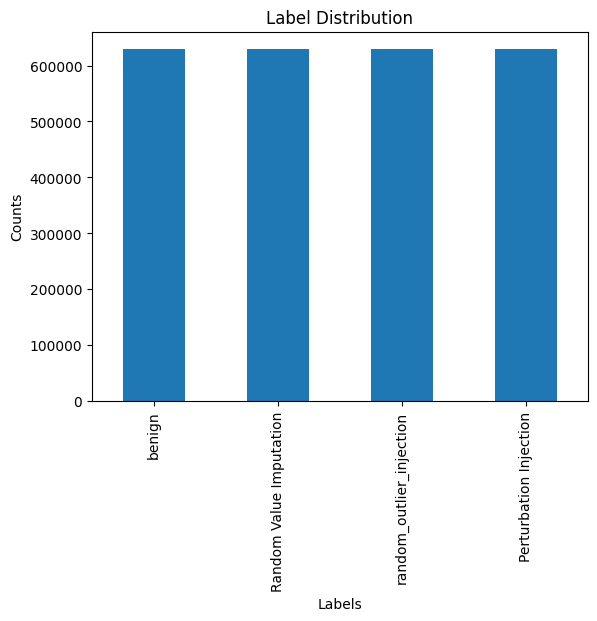

In [33]:
label_counts = data['adversarial'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

In [34]:
data.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
2515494,11521.023792,49768.058071,320.974813,320.905953,144552.036583,344.094658,393.094557,401.455577,-0.037469,348.004967,...,393.020928,16.954726,2.820907e+01,2.814037e+01,2087.995430,2088.062724,28889.955247,4.927301,7.032125,Perturbation Injection
2515495,24243.937394,55085.012747,382.931703,382.914523,174891.053884,383.093666,382.941312,574.429396,-0.006386,382.929810,...,382.979605,16.996973,1.000000e+06,9.999999e+05,765.940156,766.095318,4259.913709,0.911894,6.954203,Perturbation Injection
2515496,25698.034276,59547.957426,321.970681,322.076722,222772.995856,339.344040,374.018052,395.985181,-0.000060,342.410656,...,374.042439,16.938495,2.535226e+01,2.553928e+01,2053.993986,2053.971406,32513.968341,5.089077,6.913181,Perturbation Injection
2515497,19613.024319,41955.095577,329.992592,330.051253,104088.033590,345.622564,368.933475,431.931250,-0.095577,349.572959,...,369.021199,17.061828,3.669925e+01,3.655662e+01,1398.035157,1397.928849,50492.982947,3.018463,7.049544,Perturbation Injection
2515498,11762.940107,35246.920259,383.058906,382.958015,73618.064152,382.982895,383.028906,574.472009,0.094028,383.002052,...,383.033702,17.082847,2.000000e+06,2.000000e+06,766.028936,765.956430,8390.017297,1.023090,7.073579,Perturbation Injection


In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in data.columns:
    # Check if the column dtype is 'object'
    if data[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        data[column] = label_encoder.fit_transform(data[column])

# Now all object columns are encoded as integers

In [36]:
data.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
2515494,11521.023792,49768.058071,320.974813,320.905953,144552.036583,344.094658,393.094557,401.455577,-0.037469,348.004967,...,393.020928,16.954726,2.820907e+01,2.814037e+01,2087.995430,2088.062724,28889.955247,4.927301,7.032125,0
2515495,24243.937394,55085.012747,382.931703,382.914523,174891.053884,383.093666,382.941312,574.429396,-0.006386,382.929810,...,382.979605,16.996973,1.000000e+06,9.999999e+05,765.940156,766.095318,4259.913709,0.911894,6.954203,0
2515496,25698.034276,59547.957426,321.970681,322.076722,222772.995856,339.344040,374.018052,395.985181,-0.000060,342.410656,...,374.042439,16.938495,2.535226e+01,2.553928e+01,2053.993986,2053.971406,32513.968341,5.089077,6.913181,0
2515497,19613.024319,41955.095577,329.992592,330.051253,104088.033590,345.622564,368.933475,431.931250,-0.095577,349.572959,...,369.021199,17.061828,3.669925e+01,3.655662e+01,1398.035157,1397.928849,50492.982947,3.018463,7.049544,0
2515498,11762.940107,35246.920259,383.058906,382.958015,73618.064152,382.982895,383.028906,574.472009,0.094028,383.002052,...,383.033702,17.082847,2.000000e+06,2.000000e+06,766.028936,765.956430,8390.017297,1.023090,7.073579,0


In [37]:
data.shape

(2515499, 22)

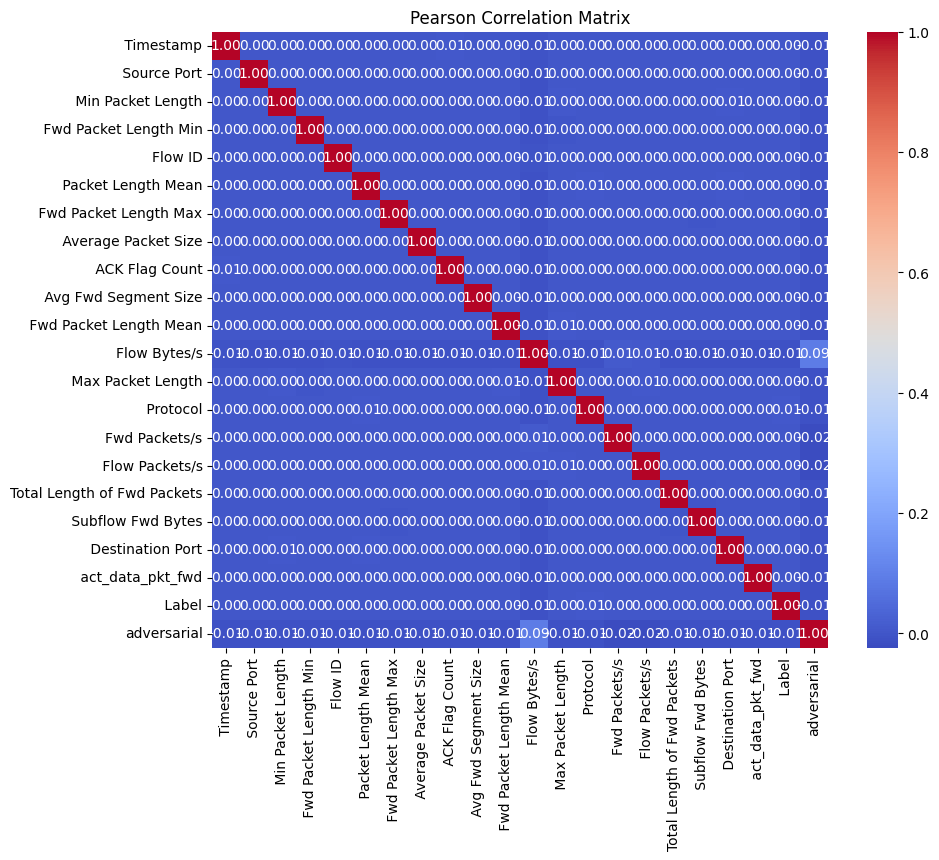

In [38]:
import seaborn as sns
# Create DataFrame
df = pd.DataFrame(data)


# Calculate Pearson correlation
correlation_matrix = df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Matrix')
plt.show()


In [39]:
# Identify highly correlated features
threshold = 0.8  # Define threshold for high correlation
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features to remove:", highly_correlated_features)

# Remove highly correlated features
df_cleaned = df.drop(columns=highly_correlated_features)

print("\nDataFrame after removing highly correlated features:")
print(df_cleaned)

Highly correlated features to remove: set()

DataFrame after removing highly correlated features:
            Timestamp   Source Port   Min Packet Length  \
0        16489.000000  42877.000000          375.000000   
1        25361.000000  50957.000000          330.000000   
2          451.000000    661.000000         1472.000000   
3         3308.000000  33922.000000          375.000000   
4        35122.000000  40276.000000          401.000000   
...               ...           ...                 ...   
2515494  11521.023792  49768.058071          320.974813   
2515495  24243.937394  55085.012747          382.931703   
2515496  25698.034276  59547.957426          321.970681   
2515497  19613.024319  41955.095577          329.992592   
2515498  11762.940107  35246.920259          383.058906   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
0                    375.000000  108220.000000           375.000000   
1                    330.000000  150843.000000     

In [40]:
df_cleaned.shape

(2515499, 22)

In [41]:
df_cleaned.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,2
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,2
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,2
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,2
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,2


In [42]:
X = df_cleaned.drop("adversarial", axis=1)
y = df_cleaned["adversarial"]

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [44]:
num_classes = len(label_encoder.classes_)
print(num_classes)

4


In [45]:
X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,16489.000000,42877.000000,375.000000,375.000000,108220.000000,375.000000,375.000000,562.500000,0.000000,375.000000,...,3.750000e+08,375.000000,17.000000,1.000000e+06,1.000000e+06,750.000000,750.000000,32700.000000,1.000000,7.000000
1,25361.000000,50957.000000,330.000000,330.000000,150843.000000,353.600000,389.000000,442.000000,0.000000,359.500000,...,1.360403e+04,389.000000,17.000000,3.784152e+01,3.784152e+01,1438.000000,1438.000000,19129.000000,3.000000,7.000000
2,451.000000,661.000000,1472.000000,1472.000000,397980.000000,1472.000000,1472.000000,2208.000000,0.000000,1472.000000,...,1.472000e+09,1472.000000,17.000000,1.000000e+06,1.000000e+06,2944.000000,2944.000000,43938.000000,1.000000,7.000000
3,3308.000000,33922.000000,375.000000,375.000000,67832.000000,375.000000,375.000000,562.500000,0.000000,375.000000,...,7.500000e+08,375.000000,17.000000,2.000000e+06,2.000000e+06,750.000000,750.000000,26422.000000,1.000000,7.000000
4,35122.000000,40276.000000,401.000000,401.000000,96408.000000,401.000000,401.000000,601.500000,0.000000,401.000000,...,8.020000e+08,401.000000,17.000000,2.000000e+06,2.000000e+06,802.000000,802.000000,57759.000000,1.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515494,11521.023792,49768.058071,320.974813,320.905953,144552.036583,344.094658,393.094557,401.455577,-0.037469,348.004967,...,9.798586e+03,393.020928,16.954726,2.820907e+01,2.814037e+01,2087.995430,2088.062724,28889.955247,4.927301,7.032125
2515495,24243.937394,55085.012747,382.931703,382.914523,174891.053884,383.093666,382.941312,574.429396,-0.006386,382.929810,...,3.830000e+08,382.979605,16.996973,1.000000e+06,9.999999e+05,765.940156,766.095318,4259.913709,0.911894,6.954203
2515496,25698.034276,59547.957426,321.970681,322.076722,222772.995856,339.344040,374.018052,395.985181,-0.000060,342.410656,...,8.709793e+03,374.042439,16.938495,2.535226e+01,2.553928e+01,2053.993986,2053.971406,32513.968341,5.089077,6.913181
2515497,19613.024319,41955.095577,329.992592,330.051253,104088.033590,345.622564,368.933475,431.931250,-0.095577,349.572959,...,1.281122e+04,369.021199,17.061828,3.669925e+01,3.655662e+01,1398.035157,1397.928849,50492.982947,3.018463,7.049544


In [46]:
df_cleaned.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,2
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,2
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,2
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,2
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,2


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [48]:
X_train

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
2145069,166395.905143,61849.912279,404.966019,404.953909,438050.040894,405.005481,405.020689,607.450622,0.024819,405.093724,...,8.100000e+08,405.084576,17.005923,2.000000e+06,2.000000e+06,810.033910,810.020880,13378.091015,0.973238,2.952183
1998285,303092.033419,19761.052051,478.069954,478.093850,77895.075094,478.047799,478.014498,717.087638,0.023433,477.974684,...,9.560000e+08,477.990746,16.964889,2.000000e+06,2.000000e+06,955.933863,955.979724,8881.904119,0.920420,2.954717
1402257,-0.190641,568.000000,1472.000000,1472.000000,142211.000000,-0.665485,1472.000000,2208.000000,0.000000,1472.000000,...,9.813333e+08,1472.000000,17.000000,6.666667e+05,6.666667e+05,2944.000000,2944.000000,15927.000000,1.000000,6.000000
368794,418191.000000,62527.000000,516.000000,516.000000,303581.000000,516.000000,516.000000,645.000000,0.000000,516.000000,...,6.877870e+02,516.000000,17.000000,1.332921e+00,1.332921e+00,2064.000000,2064.000000,9557.000000,3.000000,10.000000
1745401,-0.921888,41225.000000,0.000000,0.000000,48505.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,6.000000,2.066677e-01,2.066677e-01,0.000000,0.000000,41225.000000,0.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,159811.000000,22628.000000,0.000000,0.000000,35358.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,6.000000,2.000000e+06,2.000000e+06,0.000000,0.000000,27462.000000,0.000000,10.000000
1692743,14735.000000,0.991700,383.000000,383.000000,41956.000000,383.000000,383.000000,574.500000,0.000000,383.000000,...,7.660000e+08,383.000000,17.000000,-9.970724e-01,-9.129923e-01,766.000000,766.000000,14688.000000,1.000000,8.000000
2356330,616292.944686,48053.064632,483.062632,482.963822,290367.026826,482.959625,482.975493,724.528911,-0.042708,483.034053,...,4.830000e+08,482.984911,17.080433,9.999999e+05,1.000000e+06,966.062011,966.022355,55373.925541,0.903367,3.095085
2229084,256046.037165,34891.002893,660.077381,659.924118,192164.038425,660.008286,659.925050,989.916430,0.099257,659.977457,...,1.320000e+09,660.091990,17.044653,2.000000e+06,2.000000e+06,1320.016523,1320.081613,24319.075377,1.074243,3.069930


In [49]:
X_train.shape

(1760849, 21)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Convert the data to TensorFlow tensors
import tensorflow as tf
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.int32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.int32)

In [52]:
!pip install foolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.1 MB/s eta 0:00:00


**First Gradient Sign Method**

In [53]:
import tensorflow as tf
import numpy as np
import foolbox as fb

# Assuming X_train, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, and num_classes are already defined

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Assuming num_classes is defined
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the model by calling create_model
model = create_model()

# Train the model
history = model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=62, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Use the Foolbox library to apply the Fast Gradient Sign Method (FGSM) attack
# Convert the Keras model to a Foolbox model
fmodel = fb.TensorFlowModel(model, bounds=(0, 1))

# Create an instance of the FGSM attack
attack = fb.attacks.FGSM()

# Choose a sample to attack
X_sample = X_test_tensor[:10]  # Take the first 10 samples from the test set
y_sample = y_test_tensor[:10]

# Run the FGSM attack
adversarials = attack(fmodel, X_sample, y_sample)

# Evaluate the adversarial examples
adversarial_preds = model.predict(adversarials)
adversarial_accuracy = np.mean(np.argmax(adversarial_preds, axis=1) == y_sample)

print("Adversarial Accuracy:", adversarial_accuracy)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 128s 5ms/step - accuracy: 0.8373 - loss: 0.4465 - val_accuracy: 0.9230 - val_loss: 0.2096
Epoch 2/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 128s 5ms/step - accuracy: 0.9166 - loss: 0.2251 - val_accuracy: 0.9316 - val_loss: 0.1869
Epoch 3/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 160s 6ms/step - accuracy: 0.9281 - loss: 0.1962 - val_accuracy: 0.9415 - val_loss: 0.1590
Epoch 4/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 121s 5ms/step - accuracy: 0.9376 - loss: 0.1729 - val_accuracy: 0.9603 - val_loss: 0.1225
Epoch 5/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 134s 5ms/step - accuracy: 0.9471 - loss: 0.1517 - val_accuracy: 0.9565 - val_loss: 0.1297
Epoch 6/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - accuracy: 0.9518 - loss: 0.1406 - val_accuracy: 0.9659 - val_loss: 0.1089
Epoch 7/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 114s 5ms/step - accuracy: 0.9532 - loss: 0.1377 - val_accuracy: 0.9614 - val_loss: 0.1150
Epoch 8/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - ac

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Test Loss: 0.11738266795873642
Test Accuracy: 0.9624859094619751


TypeError: FixedEpsilonAttack.__call__() missing 1 required keyword-only argument: 'epsilons'

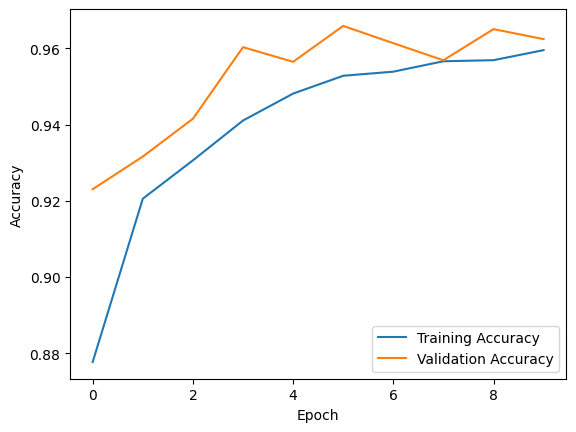

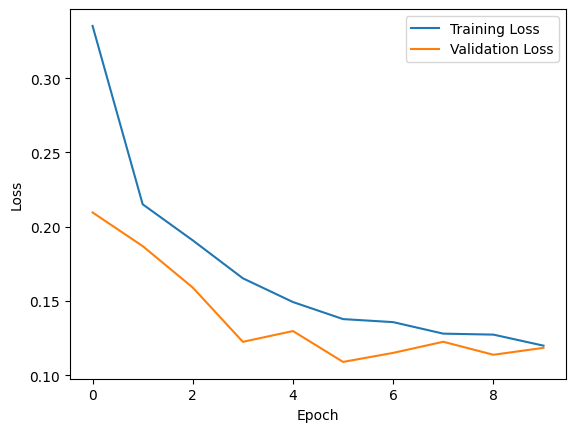

23583/23583 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9623 - loss: 0.1182
Test Loss: 0.11738266795873642
Test Accuracy: 0.9624859094619751


In [54]:
# Train the model


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


23583/23583 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step


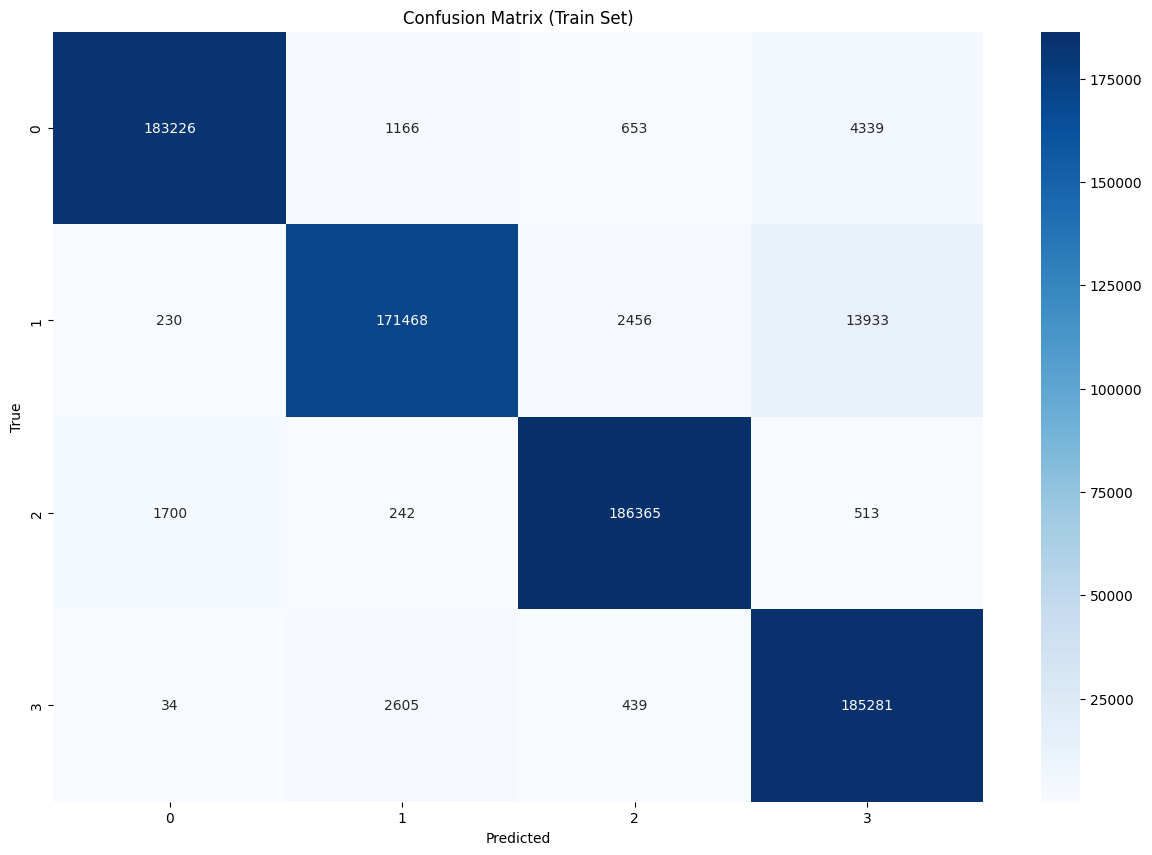

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98    189384
     Class 1       0.98      0.91      0.94    188087
     Class 2       0.98      0.99      0.98    188820
     Class 3       0.91      0.98      0.94    188359

    accuracy                           0.96    754650
   macro avg       0.96      0.96      0.96    754650
weighted avg       0.96      0.96      0.96    754650



In [55]:
# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_tensor), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, y_pred)

# Plot confusion matrix
# Plot Confusion Matrix Heatmap for Train Set
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train Set)')
plt.show()


# Generate classification report
class_names = ["Class " + str(i) for i in range(num_classes)]  # Assuming num_classes is defined
print("Classification Report:")
print(classification_report(y_test_tensor, y_pred, target_names=class_names))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


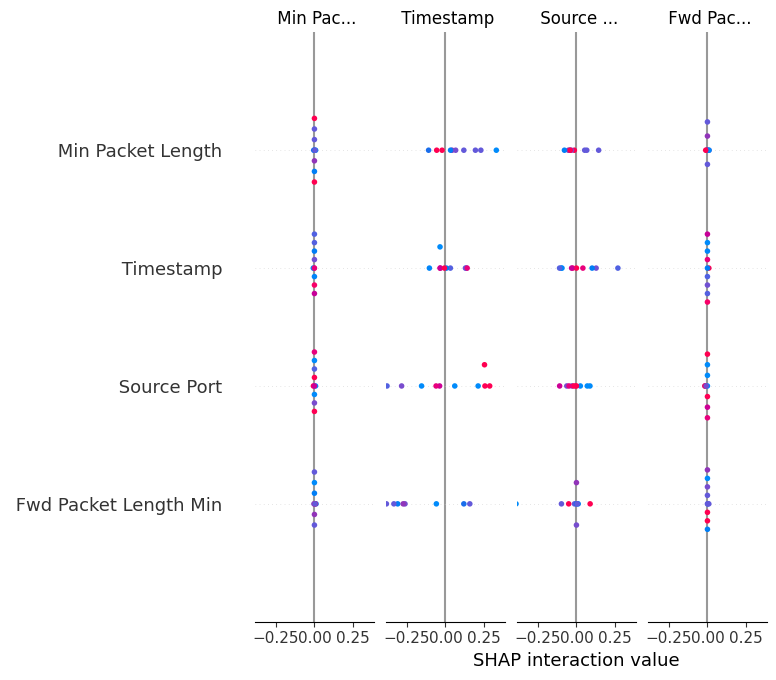

In [56]:
import shap
import numpy as np

# Convert tensors to NumPy arrays
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Initialize SHAP explainer using KernelExplainer (DeepExplainer needs a specific layer access)
explainer = shap.KernelExplainer(model.predict, X_train_np[:100])  # Use a small background sample

# Compute SHAP values for a few test samples
shap_values = explainer.shap_values(X_test_np[:10])

# Plot summary plot
shap.summary_plot(shap_values, X_test_np[:10], feature_names=X.columns.tolist())

In [57]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=48fdf13cb82ef3e10b3974d16875fff945fe25cd08c33a39db86c3d9eac5cc71
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


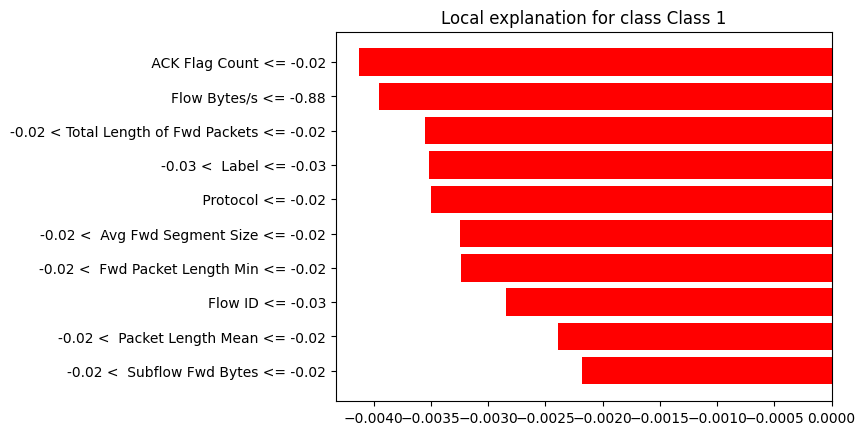

In [58]:
import lime
import lime.lime_tabular

# Convert tensors to NumPy
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Define LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=X.columns.tolist(),
    class_names=class_names,
    mode='classification'
)

# Pick a single test instance to explain
idx = 1
exp = lime_explainer.explain_instance(
    data_row=X_test_np[idx],
    predict_fn=lambda x: model.predict(x),
    num_features=10
)

# Show explanation in notebook or plot
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🔍 Explanation for Class 0 - Class 0:
  -0.02 <  Max Packet Length <= -0.02: 0.0023
  Flow ID <= -0.03: 0.0018
   ACK Flag Count <= -0.02: 0.0018
   Flow Packets/s <= -0.07: -0.0017
   Timestamp > -0.02: -0.0017
   act_data_pkt_fwd > -0.02: -0.0016
   Protocol <= -0.02: 0.0016
  -0.02 <  Subflow Fwd Bytes <= -0.02: 0.0013
  -0.03 <  Label <= -0.03: -0.0012
  Flow Bytes/s <= -0.88: -0.0012


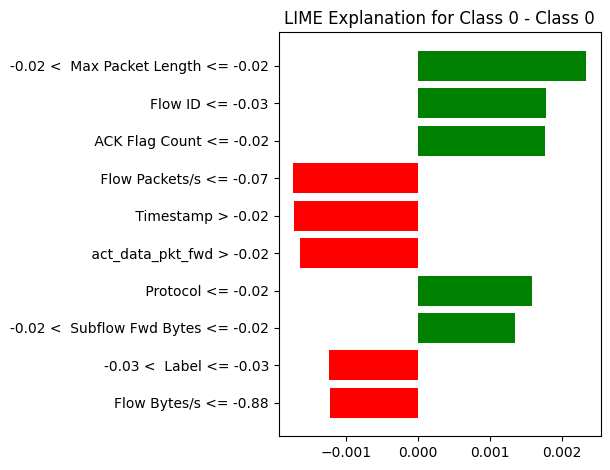


🔍 Explanation for Class 1 - Class 1:
  -0.02 <  Max Packet Length <= -0.02: -0.0059
  -0.02 <  Fwd Packet Length Max <= -0.02: -0.0056
   ACK Flag Count <= -0.02: -0.0050
  -0.02 <  Average Packet Size <= -0.02: -0.0048
   Protocol <= -0.02: -0.0044
  -0.02 <  Fwd Packet Length Min <= -0.02: -0.0042
  -0.03 <  Destination Port <= -0.02: -0.0041
   Timestamp > -0.02: 0.0033
  -0.02 <  Min Packet Length <= -0.02: -0.0033
  Fwd Packets/s <= -0.08: -0.0031


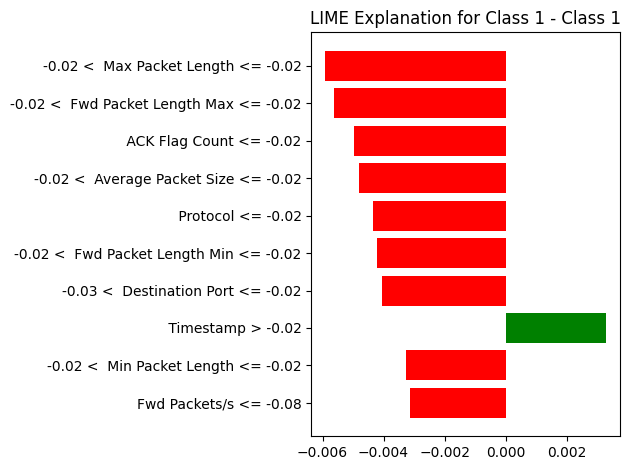


🔍 Explanation for Class 2 - Class 2:
  -0.02 <  Fwd Packet Length Max <= -0.02: 0.0043
  Flow Bytes/s <= -0.88: 0.0039
  -0.02 < Total Length of Fwd Packets <= -0.02: 0.0033
  Fwd Packets/s <= -0.08: 0.0033
  -0.02 <  Average Packet Size <= -0.02: 0.0032
  -0.02 <  Fwd Packet Length Min <= -0.02: 0.0031
   Flow Packets/s <= -0.07: 0.0030
  -0.02 <  Min Packet Length <= -0.02: 0.0027
  -0.02 <  Packet Length Mean <= -0.02: 0.0024
  -0.03 <  Destination Port <= -0.02: 0.0020


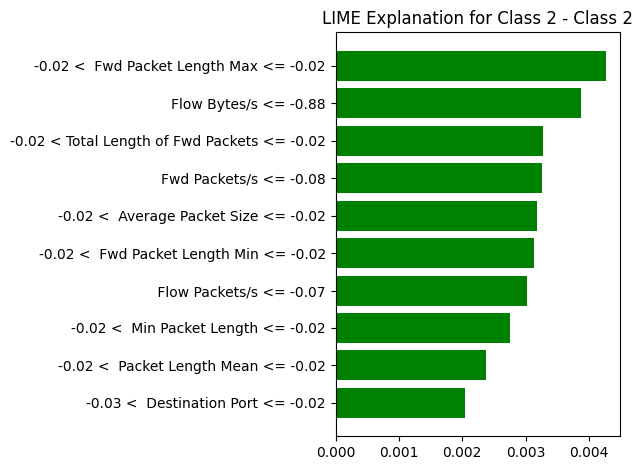


🔍 Explanation for Class 3 - Class 3:
  -0.02 <  Max Packet Length <= -0.02: 0.0023
  -0.02 <  Average Packet Size <= -0.02: 0.0018
  -0.02 <  Fwd Packet Length Max <= -0.02: 0.0017
  Flow ID <= -0.03: -0.0013
   Timestamp > -0.02: -0.0013
   act_data_pkt_fwd > -0.02: -0.0013
   ACK Flag Count <= -0.02: 0.0012
   Protocol <= -0.02: 0.0010
  -0.03 <  Destination Port <= -0.02: 0.0009
  -0.02 <  Avg Fwd Segment Size <= -0.02: 0.0007


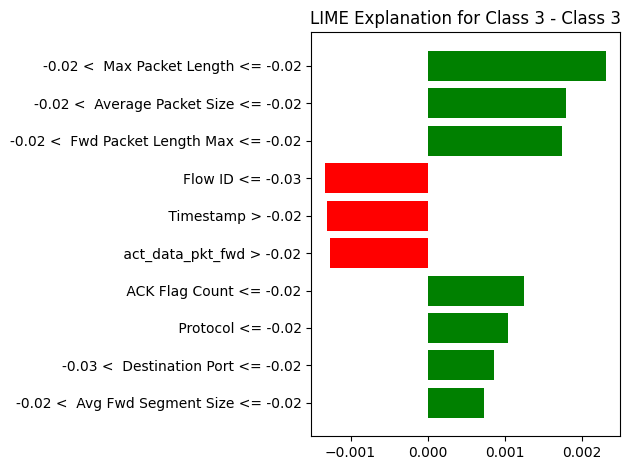

In [59]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Convert tensors to NumPy
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Define LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=X.columns.tolist(),
    class_names=class_names,
    mode='classification'
)

# Pick a single test instance to explain
idx = 1
instance = X_test_np[idx]

# Predict to get number of classes
pred = model.predict(instance.reshape(1, -1))
num_classes = pred.shape[1]

# Generate explanation for all classes
exp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=lambda x: model.predict(x),
    num_features=10,
    labels=list(range(num_classes))  # Ensure all classes are explained
)

# Print and plot explanations for each class
for class_index, class_name in enumerate(class_names):
    print(f"\n🔍 Explanation for Class {class_index} - {class_name}:")
    if class_index in exp.local_exp:
        for feature, weight in exp.as_list(label=class_index):
            print(f"  {feature}: {weight:.4f}")

        # Plot for each class
        fig = exp.as_pyplot_figure(label=class_index)
        plt.title(f"LIME Explanation for Class {class_index} - {class_name}")
        plt.tight_layout()
        plt.show()
    else:
        print("  No explanation available for this class.")


In [66]:
!pip install tensorflow==2.15.1 foolbox==3.3.0

  Using cached foolbox-3.3.0-py3-none-any.whl.metadata (7.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 680.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17

In [61]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()  # Disable eager execution

In [62]:
def fgsm_attack_custom(model, images, labels, epsilon):
    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        loss = tf.keras.losses.sparse_categorical_crossentropy(labels, predictions)
    gradient = tape.gradient(loss, images)
    signed_grad = tf.sign(gradient)
    adversarial_images = images + epsilon * signed_grad
    return tf.clip_by_value(adversarial_images, 0, 1)


**Ensemble Model**

In [63]:
import tensorflow as tf
import numpy as np
import foolbox as fb
from foolbox.attacks import FGSM, LinfDeepFoolAttack

# Assuming X_train, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, and num_classes are already defined

# Function to create the base model
def create_base_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),  # Define the input shape
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with correct number of units
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train a model (helper function)
def train_model(model, X_train, y_train, epochs=1, batch_size=62):
    return model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Create and train two base models
model1 = create_base_model(X_train_tensor.shape[1:], num_classes)
history1 = train_model(model1, X_train_tensor, y_train_tensor)

model2 = create_base_model(X_train_tensor.shape[1:], num_classes)
history2 = train_model(model2, X_train_tensor, y_train_tensor)

# Combine predictions from both models to create an ensemble input
def combine_model_predictions(model1, model2, X_train):
    preds1 = model1.predict(X_train)
    preds2 = model2.predict(X_train)
    return np.concatenate((preds1, preds2), axis=1)

X_combined_train = combine_model_predictions(model1, model2, X_train_tensor)

# Create the ensemble model
def create_ensemble_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the ensemble model
ensemble_model = create_ensemble_model(X_combined_train.shape[1:], num_classes)
ensemble_history = ensemble_model.fit(X_combined_train, y_train_tensor, epochs=10, batch_size=62, validation_split=0.2)

# Convert the ensemble model to a Foolbox model
fensemble_model = fb.TensorFlowModel(ensemble_model, bounds=(0, 1))

# Create instances of the FGSM and DeepFool attacks
fgsm_attack = FGSM()
deepfool_attack = LinfDeepFoolAttack()

# Select a subset of the test data for adversarial attacks
X_sample = np.clip(X_test_tensor[:10], 0, 1)  # Normalize to [0, 1]
y_sample = y_test_tensor[:10]

# Run the FGSM attack
#epsilons = np.linspace(0.01, 0.1, 10)  # Define epsilon values for the FGSM attack
#adversarials_fgsm = fgsm_attack(fensemble_model, X_sample, y_sample, epsilons=epsilons)
# Manually run FGSM attack
epsilon = 0.1
adversarials_fgsm = fgsm_attack_custom(fensemble_model, X_sample, y_sample, epsilon)

# Run the DeepFool attack
adversarials_deepfool = deepfool_attack(fensemble_model, X_sample, y_sample)

# Evaluate the adversarial examples
def evaluate_adversarial_preds(model, adversarials, true_labels):
    preds = model.predict(adversarials)
    return np.mean(np.argmax(preds, axis=1) == true_labels)

# Compute adversarial accuracy for both attacks
adversarial_accuracy_fgsm = evaluate_adversarial_preds(ensemble_model, adversarials_fgsm, y_sample)
adversarial_accuracy_deepfool = evaluate_adversarial_preds(ensemble_model, adversarials_deepfool, y_sample)

# Combine predictions from both attacks
combined_preds = (ensemble_model.predict(adversarials_fgsm) + ensemble_model.predict(adversarials_deepfool)) / 2
ensemble_adversarial_accuracy = np.mean(np.argmax(combined_preds, axis=1) == y_sample)

print("Ensemble Adversarial Accuracy (FGSM + DeepFool):", ensemble_adversarial_accuracy)


RuntimeError: Attempting to capture an EagerTensor without building a function.

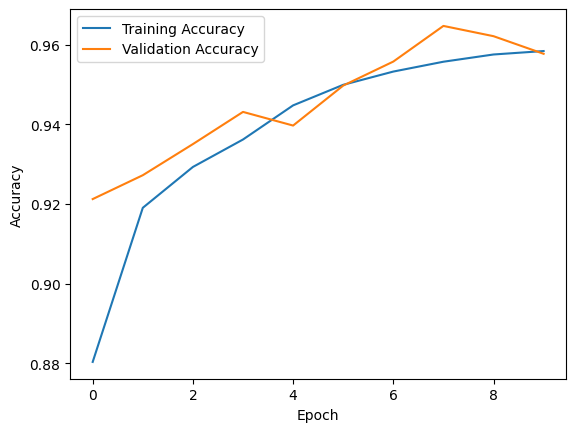

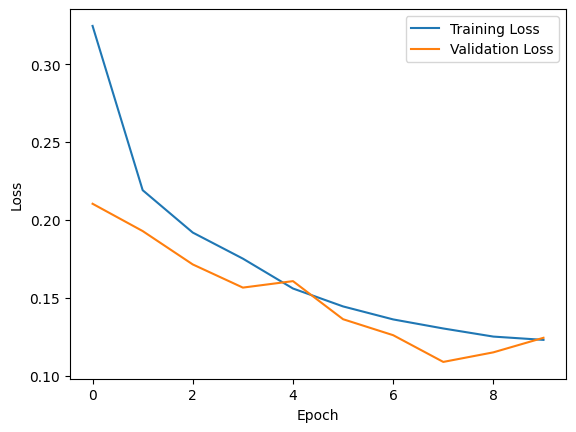

23583/23583 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9574 - loss: 0.1243
Test Loss: 0.12458579987287521
Test Accuracy: 0.9571655988693237


In [ ]:
# Train the model


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


23583/23583 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step


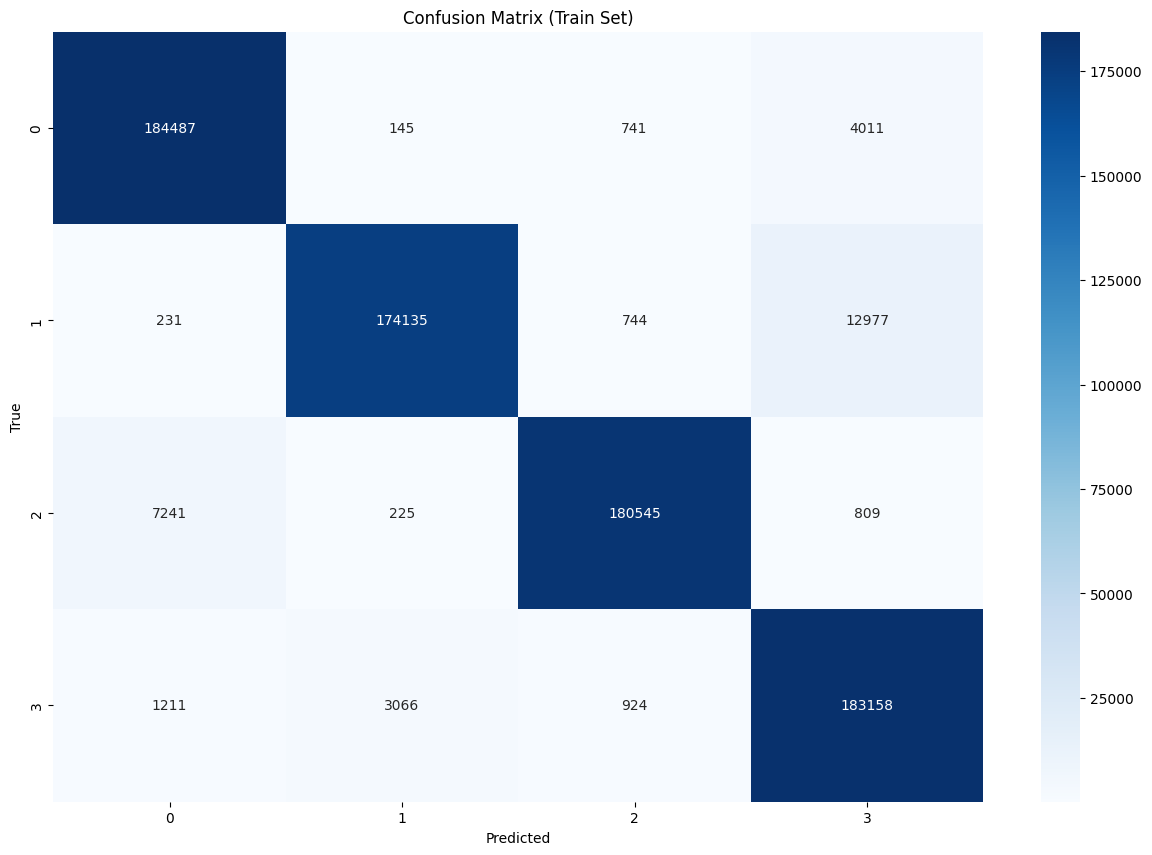

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.96    189384
     Class 1       0.98      0.93      0.95    188087
     Class 2       0.99      0.96      0.97    188820
     Class 3       0.91      0.97      0.94    188359

    accuracy                           0.96    754650
   macro avg       0.96      0.96      0.96    754650
weighted avg       0.96      0.96      0.96    754650



In [ ]:
# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_tensor), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, y_pred)

# Plot confusion matrix
# Plot Confusion Matrix Heatmap for Train Set
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train Set)')
plt.show()


# Generate classification report
class_names = ["Class " + str(i) for i in range(num_classes)]  # Assuming num_classes is defined
print("Classification Report:")
print(classification_report(y_test_tensor, y_pred, target_names=class_names))
